## Data Loading

In [246]:
import pandas as pd

# Load the survey results from the Excel file
file_path = '/Users/adamhunter/Downloads/Carbon Neutral Commuter survey results.xlsx'
survey_results = pd.read_excel(file_path)

# Display the first few rows of the dataframe
print(survey_results.columns)


Index(['ID', 'Start time', 'Completion time', 'Email', 'Name',
       'Do you ever drive a car to campus (main campus or Missoula College)?',
       'Do you ever commute by car to campus (either Main Campus or Missoula College)?',
       'How often do you consider the environmental impact of your daily commute?',
       'Which of the following environmental impacts concern you?',
       'How important do you think it is for UM to address the emissions generated by employee and student commuting to campus? ',
       'In designing a Carbon Neutral Commuter program, how important would it be for UM to invest collected funds in the following types of carbon offset projects?',
       'Question', 'Projects verified by third parties to ensure quality',
       'Projects located in Missoula and vicinity',
       'Projects that have the greatest benefits for their cost (greatest return on investment)',
       'Projects with the highest possible social impact', 'Other: ',
       '$1 - $5', '$6 - 

In [247]:
survey_results['What is your role at UM?'].value_counts()

What is your role at UM?
Staff                   167
Student                 155
Faculty                  50
Student and employee     44
Name: count, dtype: int64

In [248]:
survey_results = survey_results.query('`What is your role at UM?` == "Student" or `What is your role at UM?` == "Student and employee"')


## Response Value Counts

In [249]:
survey_results['Do you ever commute by car to campus (either Main Campus or Missoula College)?'].value_counts()



Do you ever commute by car to campus (either Main Campus or Missoula College)?
Yes    199
Name: count, dtype: int64

In [250]:
survey_results['How often do you consider the environmental impact of your daily commute?'].value_counts()


How often do you consider the environmental impact of your daily commute?
Often        59
Sometimes    49
Rarely       42
Never        38
Always       11
Name: count, dtype: int64

Showing just the counts of main selections

In [251]:
survey_results['Which of the following environmental impacts concern you?'].str.split(';').explode().value_counts().head(5)


Which of the following environmental impacts concern you?
                                                  199
Air pollution                                     127
Greenhouse gas emissions                          106
Water quality concerns from leaking fluids         74
Environmental impact of roads and parking lots     61
Name: count, dtype: int64

In [252]:
survey_results['How important do you think it is for UM to address the emissions generated by employee and student commuting to campus?\xa0'].value_counts()

How important do you think it is for UM to address the emissions generated by employee and student commuting to campus? 
Somewhat important    77
Very important        55
Not important         36
Neutral               31
Name: count, dtype: int64

In [253]:
survey_results['Projects verified by third parties to ensure quality'].value_counts()

Projects verified by third parties to ensure quality
Very important        74
Somewhat important    59
Neutral               34
Not important         32
Name: count, dtype: int64

In [254]:
survey_results['Projects located in Missoula and vicinity'].value_counts()

Projects located in Missoula and vicinity
Very important        95
Somewhat important    54
Not important         28
Neutral               22
Name: count, dtype: int64

In [255]:
survey_results['Projects with the highest possible social impact'].value_counts()

Projects with the highest possible social impact
Very important        81
Somewhat important    58
Not important         35
Neutral               25
Name: count, dtype: int64

In [256]:
survey_results['Projects that have the greatest benefits for their cost (greatest return on investment)'].value_counts()

Projects that have the greatest benefits for their cost (greatest return on investment)
Very important        97
Somewhat important    50
Neutral               27
Not important         25
Name: count, dtype: int64

In [257]:
survey_results['$1 - $5'].value_counts()

$1 - $5
Very likely        96
Very unlikely      46
Somewhat likely    32
Neutral            13
Unlikely           12
Name: count, dtype: int64

In [258]:
survey_results['$6 - $10'].value_counts()

$6 - $10
Very likely        63
Very unlikely      56
Somewhat likely    46
Neutral            22
Unlikely           12
Name: count, dtype: int64

In [259]:
survey_results['$10 - $15'].value_counts()

$10 - $15
Very unlikely      70
Very likely        40
Unlikely           30
Neutral            30
Somewhat likely    29
Name: count, dtype: int64

In [260]:
survey_results['$16 - $20'].value_counts()

$16 - $20
Very unlikely      87
Very likely        32
Unlikely           31
Neutral            28
Somewhat likely    21
Name: count, dtype: int64

## Project Prioritization Analysis - Q5

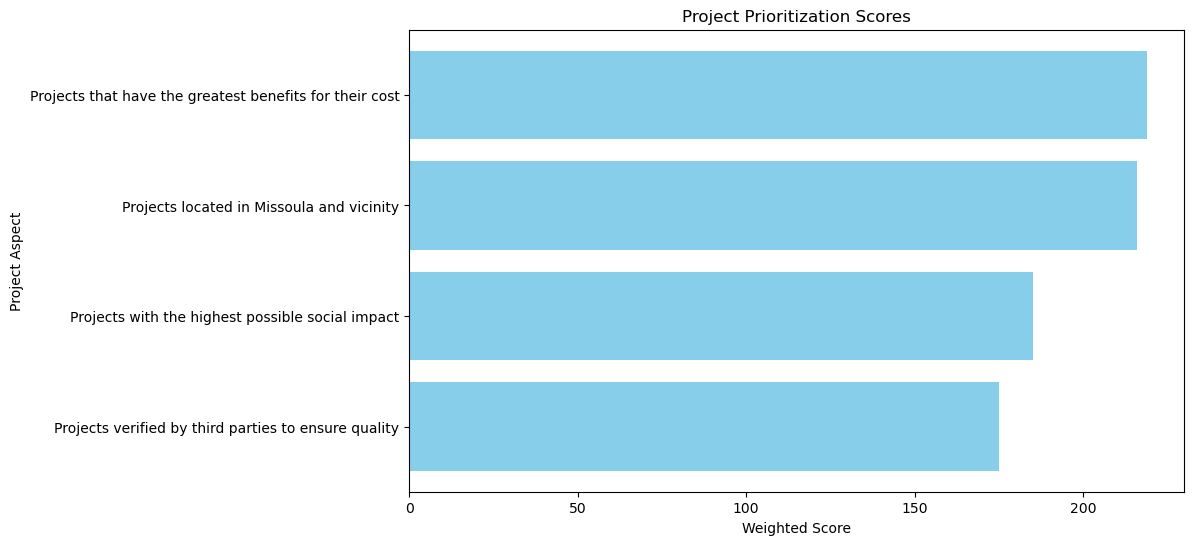

In [261]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the weights for each response category
weights = {
    'Very important': 2,
    'Somewhat important': 1,
    'Neutral': 0,
    'Not important': (-1)
}

survey_results.rename(columns={'Projects that have the greatest benefits for their cost (greatest return on investment)': 'Projects that have the greatest benefits for their cost'}, inplace=True)

# List of columns to calculate scores for
columns = [
    'Projects verified by third parties to ensure quality',
    'Projects located in Missoula and vicinity',
    'Projects with the highest possible social impact',
    'Projects that have the greatest benefits for their cost'
]

# Function to calculate weighted score for a column
def calculate_weighted_score(column):
    score = 0
    for response, count in column.items():
        score += count * weights[response]
    return score

# Calculate and print scores for each project aspect
scores = {}
for column_name in columns:
    column_data = survey_results[column_name].value_counts().to_dict()
    scores[column_name] = calculate_weighted_score(column_data)

# Sorting the scores dictionary based on scores and printing them
sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

# Preparing data for plotting
project_aspects = [item[0] for item in sorted_scores]
scores = [item[1] for item in sorted_scores]

# Creating a horizontal bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(project_aspects, scores, color='skyblue')
plt.xlabel('Weighted Score')
plt.ylabel('Project Aspect')
plt.title('Project Prioritization Scores')
plt.gca().invert_yaxis()  # To display the highest score at the top
plt.show()



2 Priorities are clear frontrunners - greatest benefit for cost + projects located in missoula and vicinity

## Price Per Semester Analysis - Q6

Assumptions made in this section:
1. very likely means a 40% chance of adopting, somewhat likely = 20%, neutral = 10%, unlikely = 5%, very unlikely = 0.
2. this is a representative sample that can be applied to a total campus population for 2024 of ~13k.
3. only half the campus population will actually be aware of the program in the first place

In [262]:
import pandas as pd

# Assuming survey_results is your DataFrame
# Define the weights for likelihood of adoption as proportions
weights = {
    'Very likely': 0.4,  # 40% chance of adopting
    'Somewhat likely': 0.2,  # 20% chance of adopting
    'Neutral': 0.1,  # 10% chance of adopting
    'Unlikely': 0.05,  # 5% chance of adopting
    'Very unlikely': 0  # 0% chance of adopting
}

# Define the price point columns
price_columns = ['$1 - $5', '$6 - $10', '$10 - $15', '$16 - $20']

campus_population = 10600
sample_size = 200
awareness_rate = 0.5

results = {}

for column in price_columns:
    responses = survey_results[column].value_counts().to_dict()
    # Calculate the total weighted score
    total_weighted_score = sum(weights[response] * count for response, count in responses.items())
    # Calculate the expected number of adoptees in the sample
    expected_adoptees_sample = total_weighted_score
    # Scale the expected number of adoptees to the entire campus
    expected_adoptees_campus = expected_adoptees_sample * awareness_rate * (campus_population / sample_size)
    price = float(column.split(' - ')[1].strip('$'))
    # Calculate expected profit for the entire campus
    expected_profit = expected_adoptees_campus * price
    results[column] = {'Expected Adoptees': expected_adoptees_campus, 'Expected Profit': expected_profit}

# Display the corrected results
for price_range, metrics in results.items():
    print(f"{price_range}: Expected Adoptees = {metrics['Expected Adoptees']:.2f}, Expected Profit = ${metrics['Expected Profit']:.2f}")

$1 - $5: Expected Adoptees = 1237.55, Expected Profit = $6187.75
$6 - $10: Expected Adoptees = 985.80, Expected Profit = $9858.00
$10 - $15: Expected Adoptees = 696.95, Expected Profit = $10454.25
$16 - $20: Expected Adoptees = 565.78, Expected Profit = $11315.50


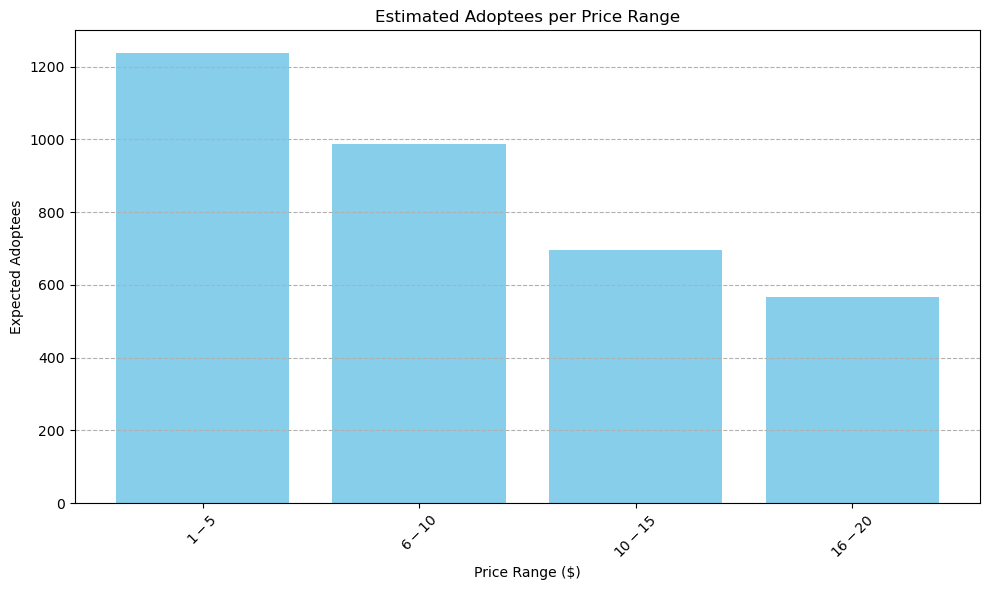

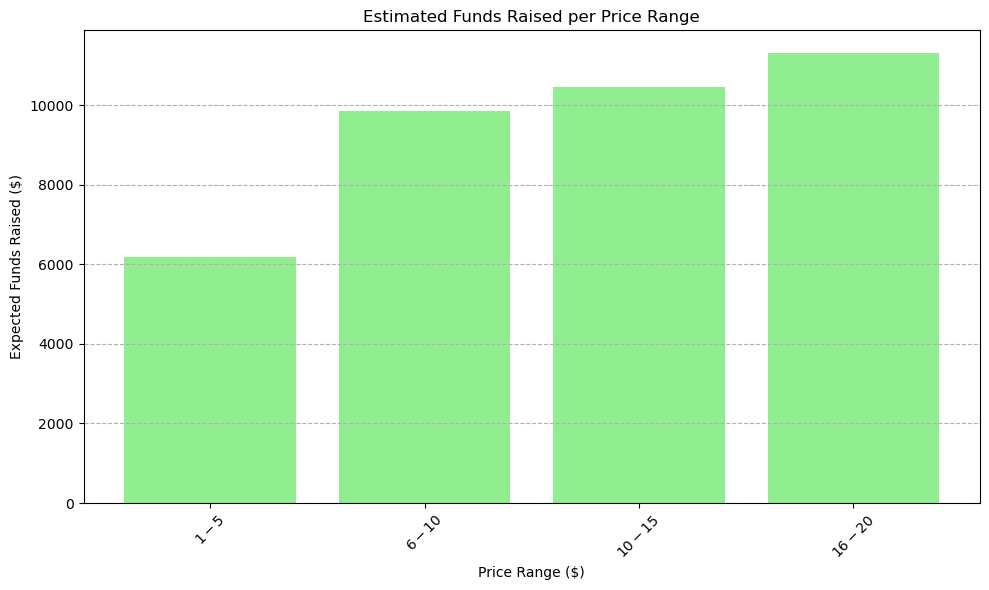

In [263]:
import matplotlib.pyplot as plt

# Extracting price ranges, expected adoptees, and expected profits for plotting
price_ranges = list(results.keys())
expected_adoptees = [metrics['Expected Adoptees'] for price_range, metrics in results.items()]
expected_profits = [metrics['Expected Profit'] for price_range, metrics in results.items()]

# Plotting Expected Adoptees
plt.figure(figsize=(10, 6))
plt.bar(price_ranges, expected_adoptees, color='skyblue')
plt.title('Estimated Adoptees per Price Range')
plt.xlabel('Price Range ($)')
plt.ylabel('Expected Adoptees')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Plotting Expected Profits
plt.figure(figsize=(10, 6))
plt.bar(price_ranges, expected_profits, color='lightgreen')
plt.title('Estimated Funds Raised per Price Range')
plt.xlabel('Price Range ($)')
plt.ylabel('Expected Funds Raised ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


### 9$ Price point is my recommendation for a balance of adoption and impact (staying single digits is nice too maybe), although an option to pay more voluntarily might be nice as well.

## Recommendations Open Response Analysis - Q8

Setting up function to categorize responses with ChatGPT

In [264]:
import openai
import pandas as pd
import re
import os

# Assuming 'survey_results' is your DataFrame and it contains a column 'open_responses'
openai.api_key = os.getenv('OPENAI_API_KEY')

response_options = {
    1: "Frustration with the program being paid for by campus users.",
    2: "Request for more parking on campus.",
    3: "Recommendation to make bus commuting more viable.",
    4: "Recommendation to make bike commuting more viable.",
    5: "Recommendation to advertise the program more.",
    6: "Recommendation to educate about the program more.",
    7: "Recommendation to reward sustainable commuting.",
    8: "Other",
    9: "No response given"
}

def categorize_response(response):
    try:
        # Convert response to string and strip leading/trailing whitespace
        response_text = "Survey response:" + str(response).strip()
        
        # Check if response_text is empty or None
        if not response_text:
            print("Response is empty or None.")
            return None

        # Constructing the prompt dynamically from the response_options dictionary
        options_text = "\n".join([f"{number}. {description}" for number, description in response_options.items()])
        prompt_text = f"""You are an expert survey analyst who will
carefully choose from the following options the category number that best fits the response you will be shown:

{options_text}

        """
        # Use the OpenAI API to generate a summary in the form of three keywords, formatted with pseudo 'tags'
        result = openai.ChatCompletion.create(
          model="gpt-4",
          messages=[
              {"role": "system", "content": prompt_text},
              {"role": "user", "content": response_text}
          ],
          max_tokens=40,
          temperature=0,
          top_p=1.0,
          n=1
        )
        # Extract the text from the result, specifically looking for the content within the 'tags'
        formatted_response = result.choices[0].message['content'].strip()
        return formatted_response
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

Create a word count column

In [265]:
survey_results['word_count'] = survey_results['What recommendations do you have regarding the marketing, promotion, or implementation of a possible Carbon Neutral Commuter program at UM?\xa0'].apply(lambda x: len(str(x).split()))


Run categorization function over all open responses with 3 or more words

In [266]:

# survey_results.loc[survey_results['word_count'] >= 3, 'categorization_raw'] = survey_results.loc[survey_results['word_count'] >= 3, 'What recommendations do you have regarding the marketing, promotion, or implementation of a possible Carbon Neutral Commuter program at UM?\xa0'].apply(categorize_response)


In [267]:
with pd.option_context('display.max_colwidth', None):
    display(survey_results[['categorization_raw', 'category_number','What recommendations do you have regarding the marketing, promotion, or implementation of a possible Carbon Neutral Commuter program at UM?\xa0']])


KeyError: "['categorization_raw', 'category_number'] not in index"

In [ ]:
def extract_number(text):
    text = str(text)  # Coerce input to be a string
    matches = re.findall(r'\d+', text)
    return int(matches[-1]) if matches else 9

# Apply the function to the 'categorization_raw' column to create a new 'category_number' column
survey_results['category_number'] = survey_results['categorization_raw'].apply(extract_number)

In [ ]:
survey_results = survey_results[survey_results['category_text'] != 'No response given']


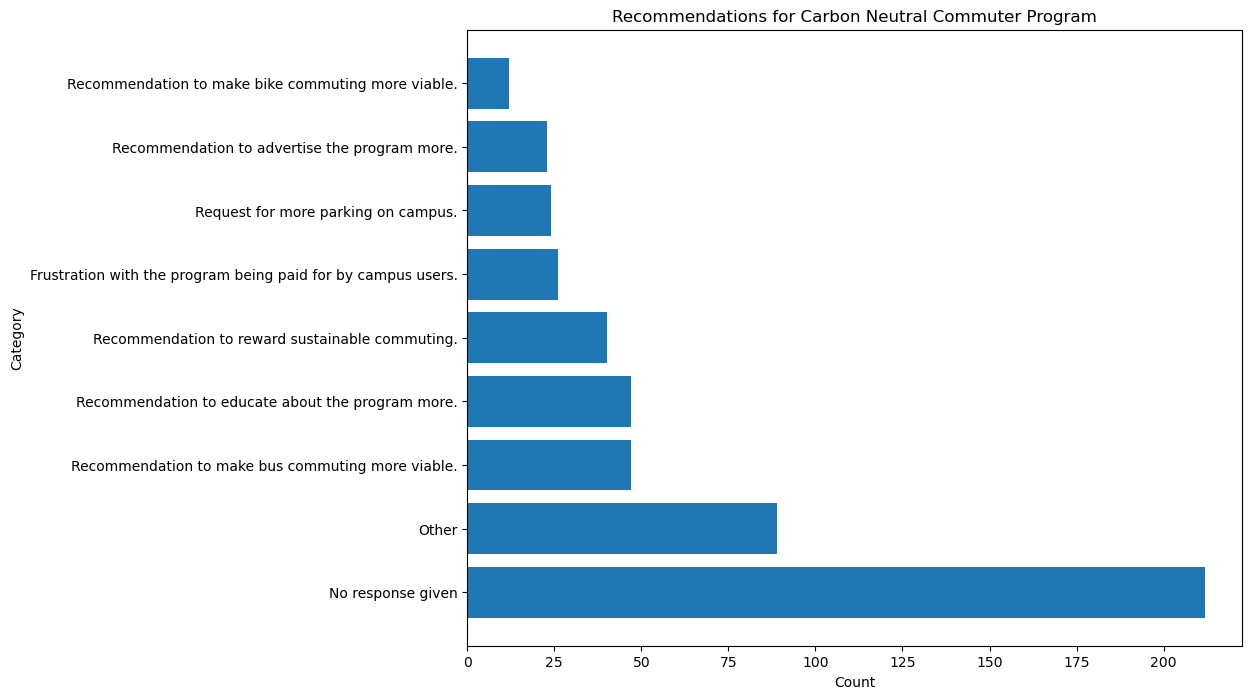

In [ ]:
# Create a new column 'category_text' by mapping the 'category_number' to its corresponding text
survey_results['category_text'] = survey_results['category_number'].map(response_options)

import matplotlib.pyplot as plt

# Count the occurrences of each category text
category_counts = survey_results['category_text'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Plotting with Matplotlib
plt.figure(figsize=(10, 8))
plt.barh(category_counts['Category'], category_counts['Count'])
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Recommendations for Carbon Neutral Commuter Program')
plt.show()


Using word count to try to estimate how much individuals care (on average) about a given issue

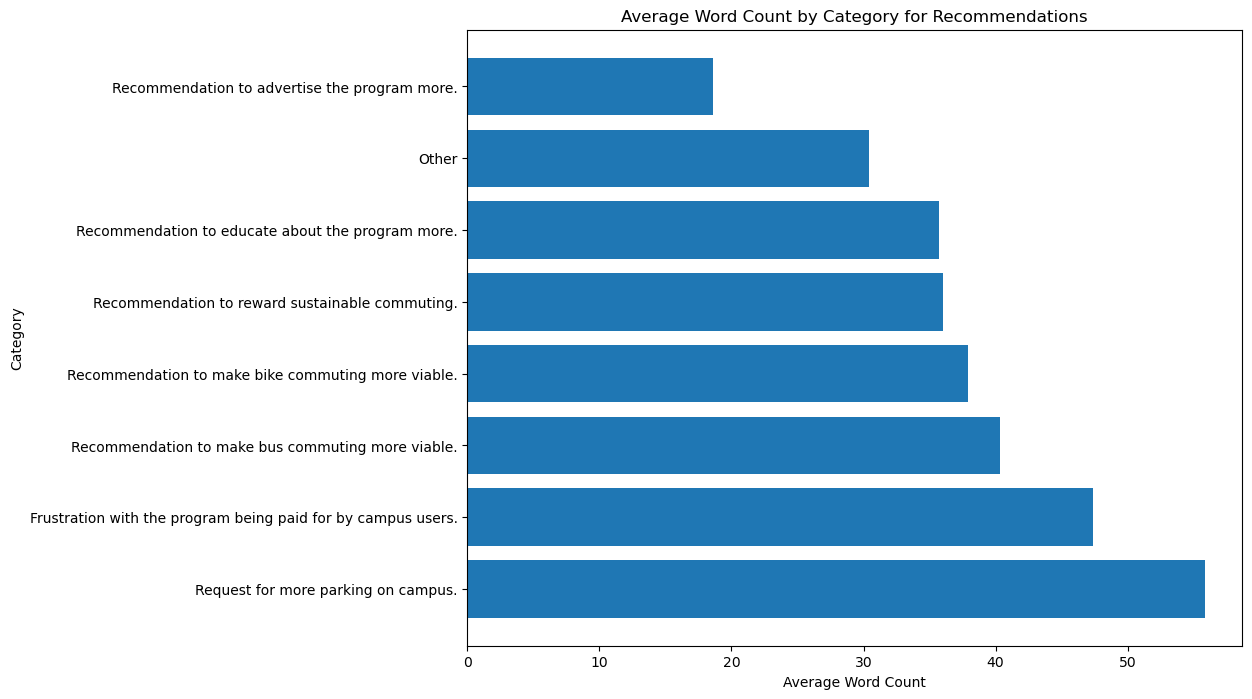

In [ ]:
# Group the data by 'category_number' and calculate the mean word count for each category
word_count_by_category = survey_results.groupby('category_text')['word_count'].mean().reset_index()

# Sort the data by word count in descending order for better visualization
word_count_by_category_sorted = word_count_by_category.sort_values(by='word_count', ascending=False)

# Plotting with Matplotlib
plt.figure(figsize=(10, 8))
plt.barh(word_count_by_category_sorted['category_text'], word_count_by_category_sorted['word_count'])
plt.xlabel('Average Word Count')
plt.ylabel('Category')
plt.title('Average Word Count by Category for Recommendations')
plt.show()
